In [1]:
#dataset used: https://www.kaggle.com/venky73/spam-mails-dataset
#This dataset is collected from http://www2.aueb.gr/users/ion/data/enron-spam/. 
#I just used enron1 folder. It contains two folders of spam and ham. Each folder contains emails. I iterated to each text file of those folders and created a dataframe and written to a csv file.

In [2]:
#important packages
import numpy as np
import pandas as pd #for dataframe creation
import string #for text pre processing
import os

#visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#SKlearn for machine learning
from sklearn.model_selection import train_test_split #splits test and train data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#neural language toolkit
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

#to calculate time
import time

In [3]:
#for Naive Bayes and various classifiers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer #we're not using it in this program, but we can.
cv = CountVectorizer()
tv = TfidfVectorizer("english") #we're not using it in this program, but we can.

In [4]:
#specially for NN
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [5]:
#for various classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [6]:
#Let's read the data from csv file. df is a dataframe. 
df = pd.read_csv('spammails.csv', encoding='latin-1')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [7]:
df['length']=df['text'].apply(len)
df.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


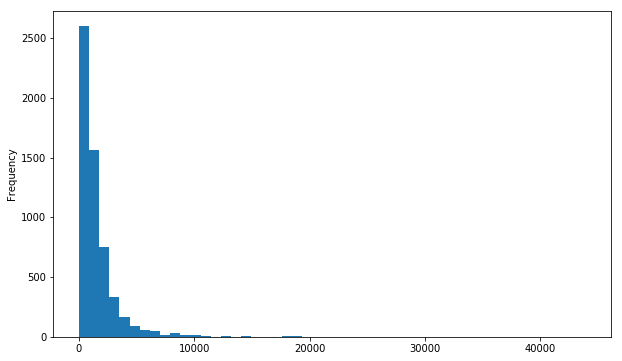

In [8]:
df['length'].plot(bins=50,kind='hist',figsize=(10,6))
#showing frequency of text according to length

In [9]:
df.length.describe()
#data about text lengths

count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B302605748>,
      dtype=object)

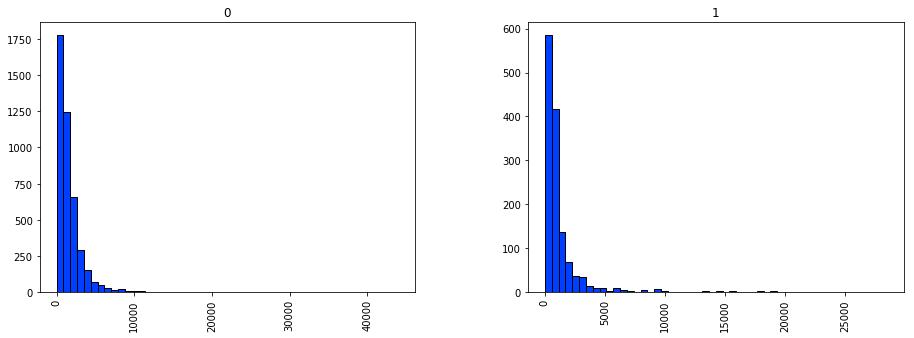

In [10]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
df.hist(column='length', by='spam', bins=50,figsize=(15,5))
#showing how length of text is related to spamminess

In [11]:
#steps:
#Preprecocessing
#Crossvalidation (GridsearchCV)
#Fitting
#Predicting
#Evaluating (test score)

In [12]:
#Basic preprocessing for common NLP tasks includes converting text to lowercase and removing punctuation and stopwords.
#Further steps, especially for text classification tasks, are:

#1.Tokenization
#2.Vectorization

In [13]:
#Now define our tex precessing function. It will remove any punctuation and stopwords aswell.
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)
#processed the text

In [14]:
text1= df['text'].copy() #for countvectorizer
text2= df['text'].copy() #for the other vectorizer

In [15]:
#Function to get vocabulary of a text.
def GetVocabulary(data): 
    vocab_set = set([])
    for document in data:
        words = document.split()
        for word in words:
            vocab_set.add(word) 
    return list(vocab_set)

In [16]:
#Finding out number of unique words in the data
vocab_list = GetVocabulary(text2)
print ('Number of all the unique words in data: ' + str(len(vocab_list)))

Number of all the unique words in data: 37441


In [17]:
'''
Bag of words with CountVectorizer
The Bag of Words representation:
https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.
In order to address this, scikit-learn provides utilities for the most common ways to extract numerical features from text content, namely:

Tokenization:
tokenizing strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.

Vectorization:
counting the occurrences of tokens in each document.

TF-IDF:
normalizing and weighting with diminishing importance tokens that occur in the majority of samples / documents.

Bag of Words:
In this scheme, features and samples are defined as follows: each individual token occurrence frequency (normalized or not) is treated as a feature.
the vector of all the token frequencies for a given document is considered a multivariate sample.
A corpus of documents can thus be represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus.
We call vectorization the general process of turning a collection of text documents into numerical feature vectors.
This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation.
Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

For futher details and example implementations see:
https://en.wikipedia.org/wiki/Bag-of-words_model
https://en.wikipedia.org/wiki/Document-term_matrix

An Introduction to Bag-of-Words in NLP
https://medium.com/greyatom/an-introduction-to-bag-of-words-in-nlp-ac967d43b428

In this kernel we apply the CountVectorizer from sklearn as BOW model.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
As tokenizer we use the remove_punctuation_and_stopwords function defined above
'''
print('text vectorization from next step')

text vectorization from next step


In [18]:
#vectorization of text using countvectorizer
text1 = text1.apply(text_process)
features_cv = cv.fit_transform(text1)

In [19]:
#we're not using it in this program, but we can.
text2 = text2.apply(text_process)
features_tv = tv.fit_transform(text2)

In [20]:
#splitting training and testing sets in two ways. in first one training set is 70%, in second one, it is 50%. (using countvectorizer data)
features1_train, features1_test, labels1_train, labels1_test = train_test_split(features_cv, df['spam'], test_size=0.3, random_state=111)
features2_train, features2_test, labels2_train, labels2_test = train_test_split(features_cv, df['spam'], test_size=0.5, random_state=111)

In [21]:
#splitting training and testing sets in two ways. in first one training set is 70%, in second one, it is 50%. (using tfidf data)
#We are not using this in this program but we can
features3_train, features3_test, labels3_train, labels3_test = train_test_split(features_tv, df['spam'], test_size=0.3, random_state=111)
features4_train, features4_test, labels4_train, labels4_test = train_test_split(features_tv, df['spam'], test_size=0.5, random_state=111)

In [22]:
#two lists to save accuracy scores of each classifier and time taken to train the model
pred_scores = []
time_taken = []

In [23]:
#Making functions for different classifiers (excluding NN)

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=40) #KNN or KNC with fixed number of neighbours
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [24]:
#list of classifiers
clfs = {'SVC' : svc,'KNN' : knc, 'MNB': mnb, 'DTC': dtc, 'LRC': lrc, 'RFC': rfc, 'ABC': abc, 'BC': bc, 'ETC': etc}

In [25]:
#Using each classifier on training and testing data sets and appending accuracy scores and time taken on respective lists

for k,v in clfs.items():
    clf=v
    #train dataset 1
    start_time = time.time()
    clf.fit(features1_train, labels1_train) #data is fit to the model
    #clf.score(features1_test, labels1_test)
    end_time=time.time()
    time_taken_ds1 = end_time - start_time

    # Evaluate the model on the training data set 1
    pred = clf.predict(features1_train)
    accuracy_score_train_ds1 = accuracy_score(labels1_train, pred)

    # Evaluate the model on the test data set 1
    pred = clf.predict(features1_test)
    accuracy_score_test_ds1 = accuracy_score(labels1_test, pred)

    #train dataset 2
    start_time = time.time()
    clf.fit(features2_train, labels2_train)
    #clf.score(features2_test, labels2_test)
    end_time=time.time()
    time_taken_ds2 = end_time - start_time

    # Evaluate the model on the training data set 1
    pred = clf.predict(features2_train)
    accuracy_score_train_ds2 = accuracy_score(labels2_train, pred)

    # Evaluate the model on the test data set 1
    pred = clf.predict(features2_test)
    accuracy_score_test_ds2 = accuracy_score(labels2_test, pred)

    pred_scores.append((k, accuracy_score_train_ds1, accuracy_score_test_ds1, accuracy_score_train_ds2, accuracy_score_test_ds2))
    time_taken.append((k, time_taken_ds1, time_taken_ds2))

In [26]:
#KNN/KNC with varying number of neighbours:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,40)
train1_accuracy =np.empty(len(neighbors))
test1_accuracy = np.empty(len(neighbors))
train2_accuracy =np.empty(len(neighbors))
test2_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knc = KNeighborsClassifier(n_neighbors=k)
    
    #FOR DATASET 1
    #Fit the model 
    knc.fit(features1_train, labels1_train)
    
    #Compute accuracy on the training set
    train1_accuracy[i] = knc.score(features1_train, labels1_train)
    
    #Compute accuracy on the test set
    test1_accuracy[i] = knc.score(features1_test, labels1_test) 

    #FOR DATASET 2
    #Fit the model 
    knc.fit(features2_train, labels2_train)
    
    #Compute accuracy on the training set
    train2_accuracy[i] = knc.score(features2_train, labels2_train)
    
    #Compute accuracy on the test set
    test2_accuracy[i] = knc.score(features2_test, labels2_test) 

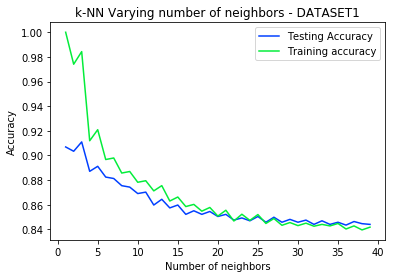

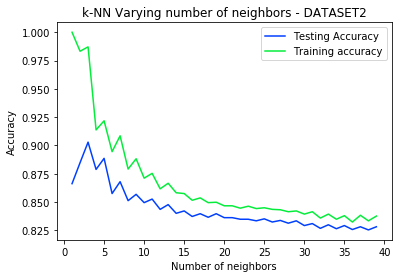

In [27]:
plt.title('k-NN Varying number of neighbors - DATASET1')
plt.plot(neighbors, test1_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train1_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

plt.title('k-NN Varying number of neighbors - DATASET2')
plt.plot(neighbors, test2_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train2_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [28]:
#stuffs for NN classifier

# Convert chars into integers

def toInt(row):
    xn = [ord(x) for x in row['text']]
    return xn
df_NN = df.copy()
df_NN['Text_int'] = df_NN.apply(toInt, axis=1)

In [29]:
df_NN.head()

,text,spam,length,Text_int
0,Subject: naturally irresistible your corporate...,1,1484,"[83, 117, 98, 106, 101, 99, 116, 58, 32, 110, ..."
1,Subject: the stock trading gunslinger fanny i...,1,598,"[83, 117, 98, 106, 101, 99, 116, 58, 32, 116, ..."
2,Subject: unbelievable new homes made easy im ...,1,448,"[83, 117, 98, 106, 101, 99, 116, 58, 32, 117, ..."
3,Subject: 4 color printing special request add...,1,500,"[83, 117, 98, 106, 101, 99, 116, 58, 32, 52, 3..."
4,"Subject: do not have money , get software cds ...",1,235,"[83, 117, 98, 106, 101, 99, 116, 58, 32, 100, ..."


In [30]:
# Get max element from text (this will be used for normalization)
df_NN['Max_of'] = df_NN['Text_int'].map(lambda x: max(x))

print("Number of max value: ",df_NN['Max_of'].max())

Number of max value:  126


In [31]:
X = df_NN['Text_int'].values
y = df_NN['spam'].values

for i in range(len(df_NN)):
    X[i] = np.asarray(X[i])

In [32]:
# split the data : dataset 1
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3)
# split the data : dataset 2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.5)

In [33]:
# Change length of message to 100 chars
max_review_length = 100

X_train1 = sequence.pad_sequences(X_train1, maxlen=max_review_length)
X_test1 = sequence.pad_sequences(X_test1, maxlen=max_review_length)

X_train2 = sequence.pad_sequences(X_train2, maxlen=max_review_length)
X_test2 = sequence.pad_sequences(X_test2, maxlen=max_review_length)

In [34]:
X_train1 = X_train1 / 126
X_test1 = X_test1 / 126

X_train2 = X_train2 / 126
X_test2 = X_test2 / 126

In [35]:
#reshape all array

X_test1 = X_test1.T
X_train1 = X_train1.T
y_test1 = y_test1.T
y_train1 = y_train1.T

X_test2 = X_test2.T
X_train2 = X_train2.T
y_test2 = y_test2.T
y_train2 = y_train2.T

In [36]:
'''
Mathematical expression of the algorithm:

- Initialize the parameters of the model
- Learn the parameters for the model by minimizing the cost  
- Use the learned parameters to make predictions (on the test set)
- Analyse the results and conclude

Make helper function
'''

'\nMathematical expression of the algorithm:\n\n- Initialize the parameters of the model\n- Learn the parameters for the model by minimizing the cost  \n- Use the learned parameters to make predictions (on the test set)\n- Analyse the results and conclude\n\nMake helper function\n'

In [37]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1/(1+np.exp(-z))

    return s

In [38]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim, 1))
    b = float(0)

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [39]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X)+b)                                  # compute activation
    cost = (-1/m) * (Y*np.log(A) + (1-Y)*np.log(1-A)).sum()            # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = np.dot(X, (A-Y).T) / m
    db = 1/m * (A-Y).sum()

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [40]:
'''
Optimization:
Initialized Ours parameters.
Compute a cost function and its gradient.
Update the parameters using gradient descent.
'''

'\nOptimization:\nInitialized Ours parameters.\nCompute a cost function and its gradient.\nUpdate the parameters using gradient descent.\n'

In [41]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w = w - learning_rate * dw
        b = b - learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [42]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T, X) + b)
           
    # Convert probabilities A[0,i] to actual predictions p[0,i]
    Y_prediction = np.around(A, decimals=0)
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [43]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 10000, learning_rate = 0.005, print_cost = False):
    """
    Builds the logistic regression model by calling the function We've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """

    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    accuracy_score_train = 1- (np.mean(np.abs(Y_prediction_train - Y_train)))
    accuracy_score_test = 1- (np.mean(np.abs(Y_prediction_test - Y_test)))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train,
         "accuracy_score_train" : accuracy_score_train,
         "accuracy_score_test" : accuracy_score_test,
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [44]:
start_time = time.time()
d = model(X_train1, y_train1, X_test1, y_test1, num_iterations = 10000, learning_rate = 0.005, print_cost = True)
end_time = time.time()
time_taken_ds1 = end_time - start_time
print(d['accuracy_score_train'])
accuracy_score_train_ds1 = d['accuracy_score_train']
accuracy_score_test_ds1 = d['accuracy_score_test']

start_time = time.time()
d = model(X_train2, y_train2, X_test2, y_test2, num_iterations = 10000, learning_rate = 0.005, print_cost = True)
end_time = time.time()
time_taken_ds2 = end_time - start_time
accuracy_score_train_ds2 = d['accuracy_score_train']
accuracy_score_test_ds2 = d['accuracy_score_test']

pred_scores.append(('NN', accuracy_score_train_ds1, accuracy_score_test_ds1, accuracy_score_train_ds1, accuracy_score_test_ds1))
time_taken.append(('NN', time_taken_ds1, time_taken_ds2))

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.548719
Cost after iteration 200: 0.545292
Cost after iteration 300: 0.541977
Cost after iteration 400: 0.538754
Cost after iteration 500: 0.535622
Cost after iteration 600: 0.532577
Cost after iteration 700: 0.529617
Cost after iteration 800: 0.526740
Cost after iteration 900: 0.523943
Cost after iteration 1000: 0.521223
Cost after iteration 1100: 0.518578
Cost after iteration 1200: 0.516007
Cost after iteration 1300: 0.513506
Cost after iteration 1400: 0.511073
Cost after iteration 1500: 0.508707
Cost after iteration 1600: 0.506405
Cost after iteration 1700: 0.504165
Cost after iteration 1800: 0.501986
Cost after iteration 1900: 0.499865
Cost after iteration 2000: 0.497801
Cost after iteration 2100: 0.495792
Cost after iteration 2200: 0.493836
Cost after iteration 2300: 0.491932
Cost after iteration 2400: 0.490077
Cost after iteration 2500: 0.488271
Cost after iteration 2600: 0.486511
Cost after iteration 2700: 0.484797
Cost

In [45]:
df_scores = pd.DataFrame(pred_scores, columns=['Classifier', 'Acc Score on Train Dataset 1', 'Acc Score on Test Dataset 1', 'Acc Score on Train Dataset 2', 'Acc Score on Test Dataset 2'])
df_scores

,Classifier,Acc Score on Train Dataset 1,Acc Score on Test Dataset 1,Acc Score on Train Dataset 2,Acc Score on Test Dataset 2
0,RFC,1.000000,0.980803,1.000000,0.976257
1,ABC,0.986031,0.972077,0.993017,0.971369
2,MNB,0.998254,0.992437,0.999302,0.990223
3,LRC,0.998254,0.983130,0.998953,0.978701
4,DTC,0.996258,0.949971,0.997556,0.953212
5,KNN,0.838364,0.841768,0.834148,0.825768
6,SVC,0.831629,0.838278,0.830307,0.842179
7,ETC,1.000000,0.972659,1.000000,0.953561
8,BC,0.996009,0.958697,0.997556,0.959497
9,NN,0.812921,0.796975,0.812921,0.796975


In [46]:
df_time = pd.DataFrame(time_taken, columns=['Classifier', 'Time Taken on Train Dataset 1', 'Time Taken on Train Dataset 2'])
df_time

,Classifier,Time Taken on Train Dataset 1,Time Taken on Train Dataset 2
0,RFC,1.071262,0.740037
1,ABC,5.723159,3.837648
2,MNB,0.005950,0.005978
3,LRC,0.082332,0.062793
4,DTC,0.486432,0.307635
5,KNN,0.001998,0.001994
6,SVC,2.309323,1.182775
7,ETC,0.653671,0.496015
8,BC,3.557896,2.278205
9,NN,4.962340,3.870528


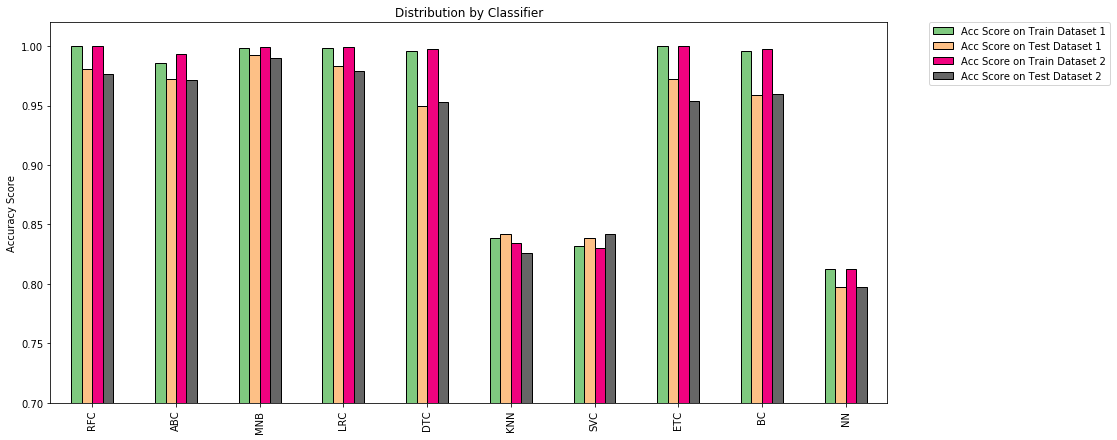

In [47]:
df_scores.plot(kind='bar', ylim=(0.7,1.02), figsize=(15,7), align='center', colormap="Accent", y=['Acc Score on Train Dataset 1', 'Acc Score on Test Dataset 1', 'Acc Score on Train Dataset 2', 'Acc Score on Test Dataset 2'])
MLlabels=df_scores['Classifier']
plt.xticks(np.arange(10), MLlabels)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

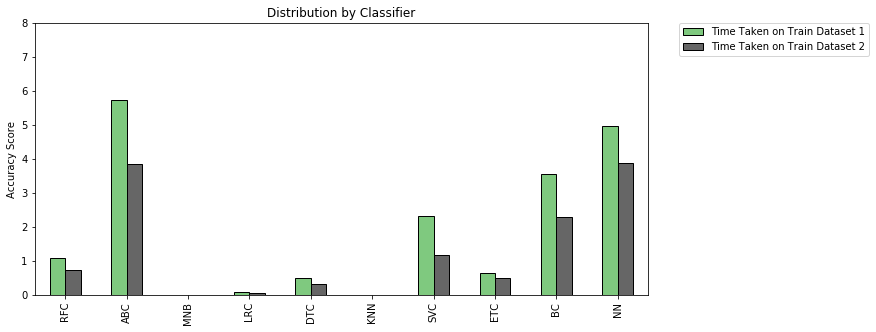

In [48]:
df_time.plot(kind='bar', ylim=(0,8), figsize=(11,5), align='center', colormap="Accent", y=['Time Taken on Train Dataset 1', 'Time Taken on Train Dataset 2'])
MLlabels=df_time['Classifier']
plt.xticks(np.arange(10), MLlabels)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)